In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [18]:


# Step 2: Load the CSV file
# Replace 'your_file.csv' with the path to your CSV
df = pd.read_csv(r"D:\data science\Project\Quote-Equity-MARUTI-EQ-15-01-2026-15-02-2026.csv")

df.head

# remove commas and convert to numbers
cols_to_convert = ["OPEN", "HIGH", "LOW", "CLOSE", "VOLUME", "VWAP"]

for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(",", "")
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.dropna(inplace=True)

In [19]:
df.columns = df.columns.str.strip().str.upper()

In [20]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
DATE              0
SERIES            0
OPEN              0
HIGH              0
LOW               0
PREV. CLOSE       0
LTP               0
CLOSE             0
VWAP              0
52W H             0
52W L             0
VOLUME            0
VALUE             0
NO. OF  TRADES    0
dtype: int64


In [21]:
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)

In [22]:
print(df[['DATE', 'CLOSE', 'VOLUME']])

         DATE    CLOSE   VOLUME
0  2026-02-13  15237.0   208645
1  2026-02-12  15326.0   201895
2  2026-02-11  15412.0   360742
3  2026-02-10  15146.0   360240
4  2026-02-09  14978.0   200034
5  2026-02-06  14997.0   276529
6  2026-02-05  15059.0   374759
7  2026-02-04  15071.0   451065
8  2026-02-03  14782.0   638870
9  2026-02-02  14384.0   621514
10 2026-02-01  14199.0   393678
11 2026-01-30  14599.0   946509
12 2026-01-29  14502.0   716545
13 2026-01-28  14877.0  1584483
14 2026-01-27  15245.0   565768
15 2026-01-23  15469.0   338669
16 2026-01-22  15765.0   352320
17 2026-01-21  15770.0   345738
18 2026-01-20  15879.0   289609
19 2026-01-19  16176.0   385141
20 2026-01-16  15859.0   703056


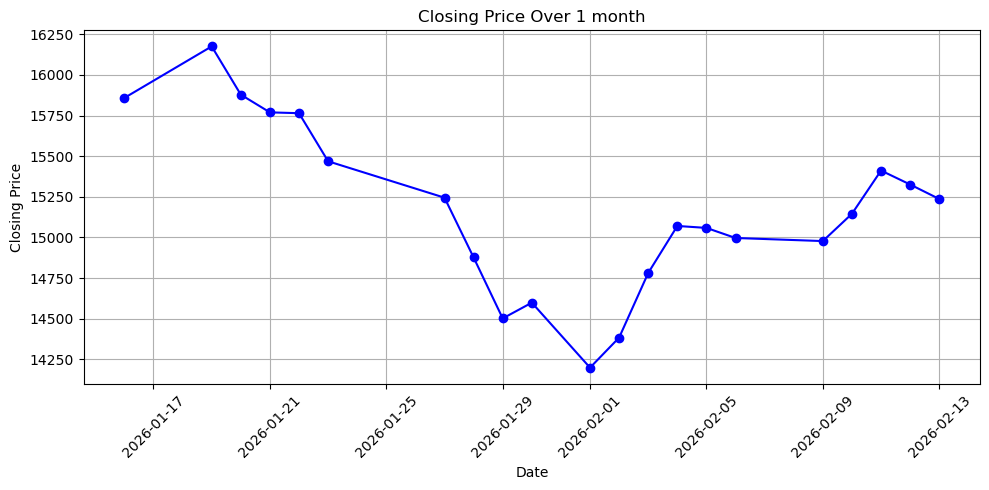

In [23]:
plt.figure(figsize=(10,5))
plt.plot(df['DATE'], df['CLOSE'], marker='o', linestyle='-', color='blue')
plt.title('Closing Price Over 1 month')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


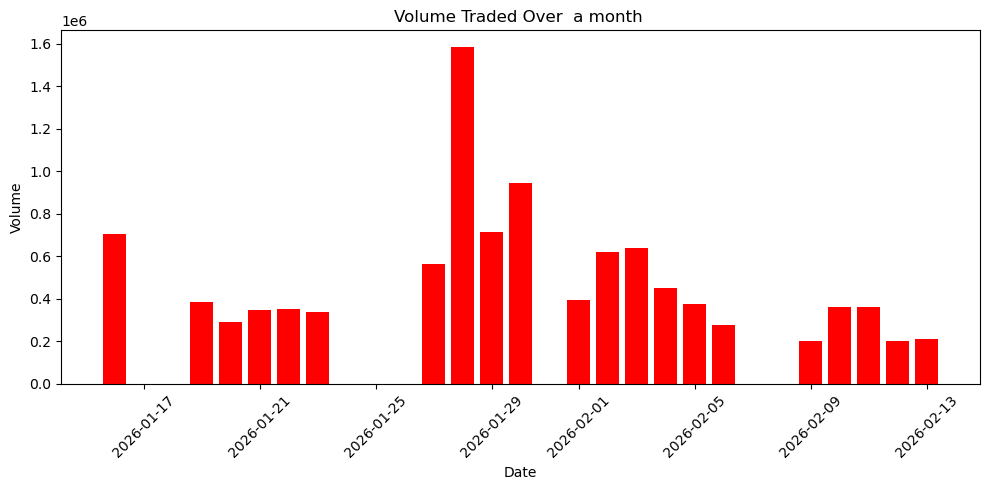

In [24]:
plt.figure(figsize=(10,5))
plt.bar(df['DATE'], df['VOLUME'], color='red')
plt.title('Volume Traded Over  a month ')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
numeric_cols = ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']


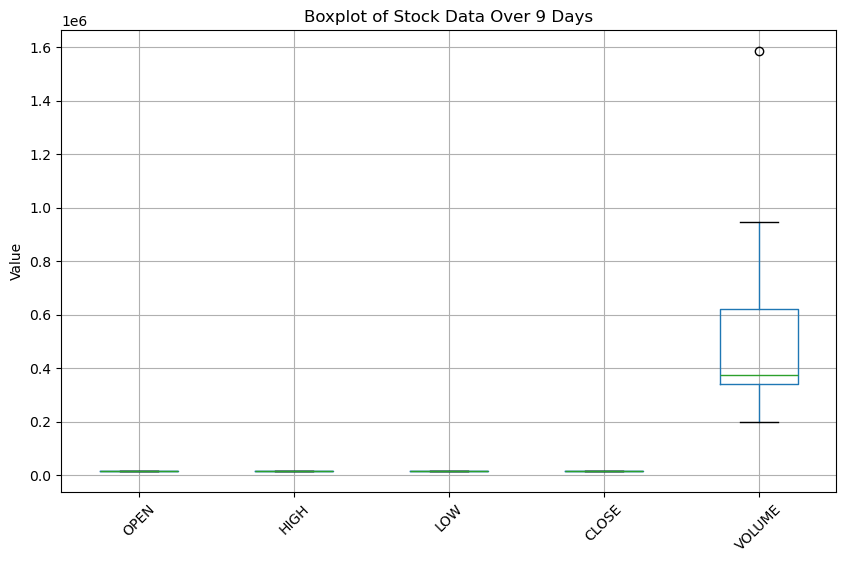

In [26]:
plt.figure(figsize=(10,6))
df[numeric_cols].boxplot()
plt.title('Boxplot of Stock Data Over 9 Days')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


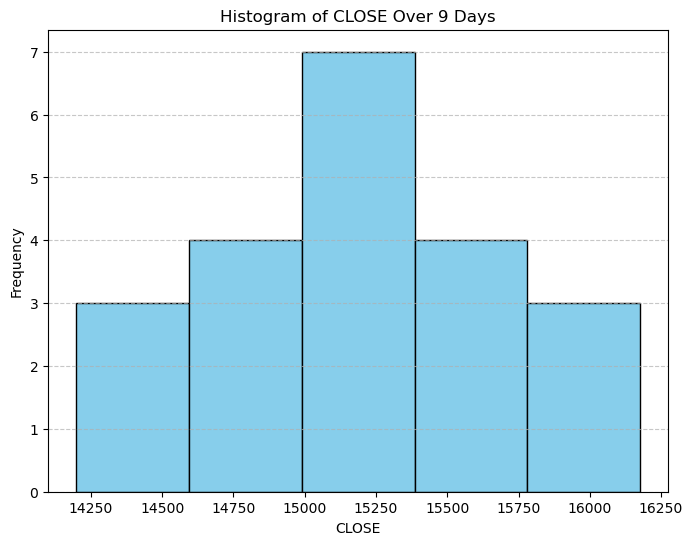

In [27]:
df.columns = df.columns.str.strip().str.upper()

# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)

# Choose column to plot histogram for
column = 'CLOSE'

# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(df[column], bins=5, color='skyblue', edgecolor='black')  # bins can be changed
plt.title(f'Histogram of {column} Over 9 Days')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

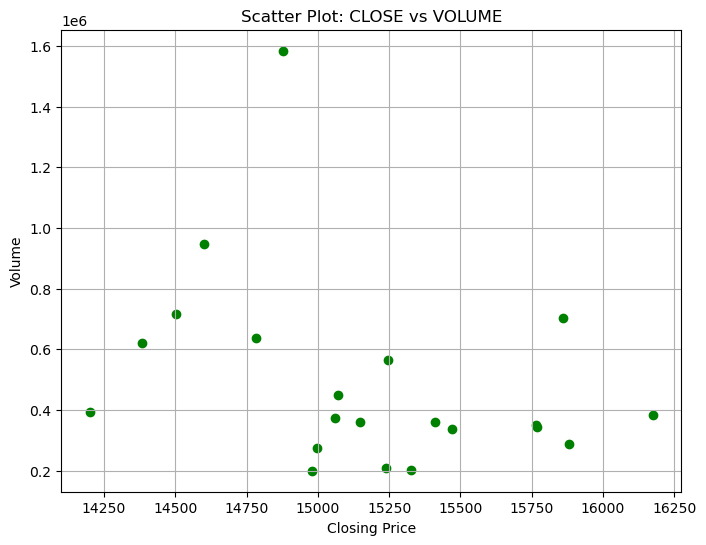

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(df['CLOSE'], df['VOLUME'], color='green')
plt.title('Scatter Plot: CLOSE vs VOLUME')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


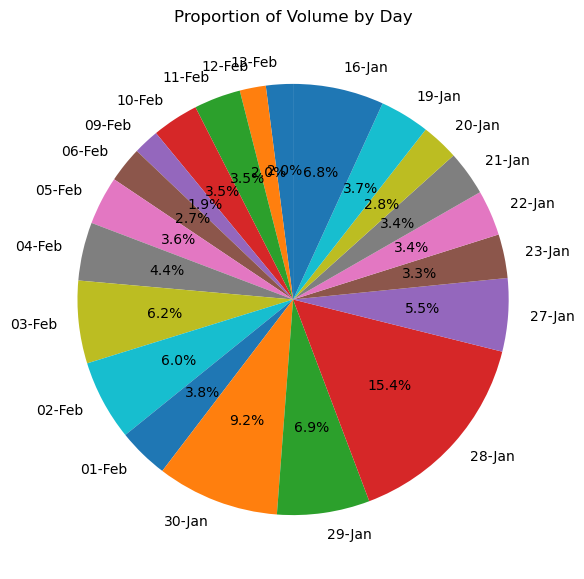

In [29]:
plt.figure(figsize=(7,7))
plt.pie(df['VOLUME'], labels=df['DATE'].dt.strftime('%d-%b'), autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Volume by Day')
plt.show()


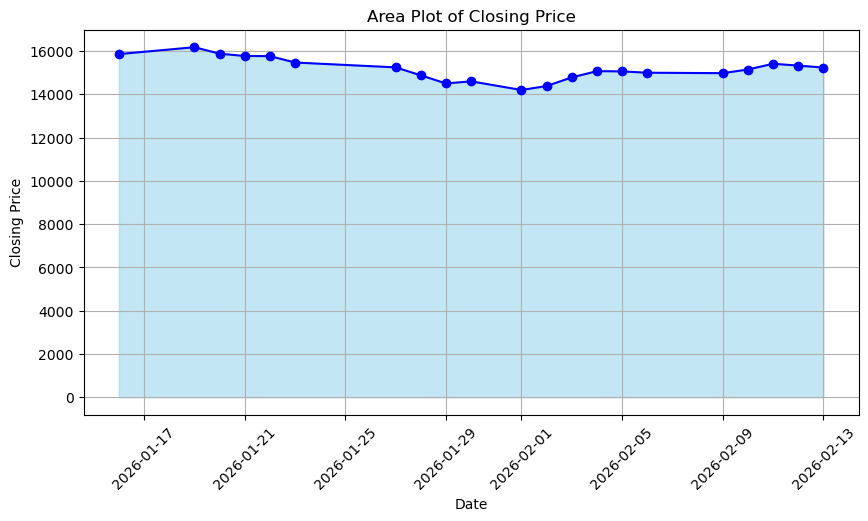

In [30]:
plt.figure(figsize=(10,5))
plt.fill_between(df['DATE'], df['CLOSE'], color='skyblue', alpha=0.5)
plt.plot(df['DATE'], df['CLOSE'], color='blue', marker='o')
plt.title('Area Plot of Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [31]:
print(df.columns)

Index(['DATE', 'SERIES', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'LTP', 'CLOSE',
       'VWAP', '52W H', '52W L', 'VOLUME', 'VALUE', 'NO. OF  TRADES'],
      dtype='object')


In [32]:
df.columns = df.columns.str.strip().str.lower()
df.head()

,date,series,open,high,low,prev. close,ltp,close,vwap,52w h,52w l,volume,value,no. of trades
0,2026-02-13,EQ,15309.0,15434.0,15190.0,"15,326.00","15,211.00",15237.0,15307.46,"17,370.00","11,059.45",208645,"3,19,38,25,032.00",40029
1,2026-02-12,EQ,15459.0,15459.0,15265.0,"15,412.00","15,328.00",15326.0,15358.45,"17,370.00","11,059.45",201895,"3,10,07,94,527.00",33240
2,2026-02-11,EQ,15180.0,15432.0,15174.0,"15,146.00","15,432.00",15412.0,15359.12,"17,370.00","11,059.45",360742,"5,54,06,78,740.00",56899
3,2026-02-10,EQ,14999.0,15349.0,14983.0,"14,978.00","15,136.00",15146.0,15192.63,"17,370.00","11,059.45",360240,"5,47,29,93,454.00",54830
4,2026-02-09,EQ,15125.0,15126.0,14905.0,"14,997.00","14,980.00",14978.0,14982.94,"17,370.00","11,059.45",200034,"2,99,70,97,685.00",35504


In [34]:
# price return
df["return"] = df["close"].pct_change()

# moving averages
df["ma_5"] = df["close"].rolling(5).mean()
df["ma_10"] = df["close"].rolling(10).mean()

# volatility
df["volatility"] = df["close"].rolling(5).std()

# target → 1 if price goes up next day
df["target"] = (df["close"].shift(-1) > df["close"]).astype(int)

df.dropna(inplace=True)

In [35]:
from sklearn.model_selection import train_test_split

X = df[["open", "high", "low", "volume", "vwap", "ma_5", "ma_10", "volatility"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 1.0
